In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import fitle as fl
import vector
import mplhep
import scipy
import iminuit
mplhep.style.use(mplhep.style.LHCb2)

loading in MERR, nominal error distribution

In [2]:
f = uproot.open("../data/MERR.root")

In [3]:
Dp_DTF_MERR = f['DecayTree']["Dp_DTF_MERR"].array()

loading in monte carlo simulations

In [4]:
Dp_tree=uproot.open("../data/mc/raw/Dp.root")["Truth"]["t"]

Dp_ssK_TRUEP_E = np.asarray(Dp_tree["ssK_TRUEP_E"])
Dp_ssK_TRUEP_X = np.asarray(Dp_tree["ssK_TRUEP_X"])
Dp_ssK_TRUEP_Y = np.asarray(Dp_tree["ssK_TRUEP_Y"])
Dp_ssK_TRUEP_Z = np.asarray(Dp_tree["ssK_TRUEP_Z"])

Dp_osK_TRUEP_E = np.asarray(Dp_tree["osK_TRUEP_E"])
Dp_osK_TRUEP_X = np.asarray(Dp_tree["osK_TRUEP_X"])
Dp_osK_TRUEP_Y = np.asarray(Dp_tree["osK_TRUEP_Y"])
Dp_osK_TRUEP_Z = np.asarray(Dp_tree["osK_TRUEP_Z"])

Dp_sspi_TRUEP_E = np.asarray(Dp_tree["sspi_TRUEP_E"])
Dp_sspi_TRUEP_X = np.asarray(Dp_tree["sspi_TRUEP_X"])
Dp_sspi_TRUEP_Y = np.asarray(Dp_tree["sspi_TRUEP_Y"])
Dp_sspi_TRUEP_Z = np.asarray(Dp_tree["sspi_TRUEP_Z"])

Dp_ssK_vec   = vector.array({"px": Dp_ssK_TRUEP_X, "py":Dp_ssK_TRUEP_Y, "pz":Dp_ssK_TRUEP_Z, "E":Dp_ssK_TRUEP_E})
Dp_osK_vec   = vector.array({"px": Dp_osK_TRUEP_X, "py":Dp_osK_TRUEP_Y, "pz":Dp_osK_TRUEP_Z, "E":Dp_osK_TRUEP_E})
Dp_sspi_vec  = vector.array({"px": Dp_sspi_TRUEP_X, "py":Dp_sspi_TRUEP_Y, "pz":Dp_sspi_TRUEP_Z, "E":Dp_sspi_TRUEP_E})

Dp_mother_vec = Dp_ssK_vec + Dp_osK_vec + Dp_sspi_vec
Dp_mother_mass = Dp_mother_vec.mass

In [5]:
Ds_tree=uproot.open("../data/mc/raw/Ds.root")["Truth"]["t"]

Ds_ssK_TRUEP_E = np.asarray(Ds_tree["ssK_TRUEP_E"])
Ds_ssK_TRUEP_X = np.asarray(Ds_tree["ssK_TRUEP_X"])
Ds_ssK_TRUEP_Y = np.asarray(Ds_tree["ssK_TRUEP_Y"])
Ds_ssK_TRUEP_Z = np.asarray(Ds_tree["ssK_TRUEP_Z"])

Ds_osK_TRUEP_E = np.asarray(Ds_tree["osK_TRUEP_E"])
Ds_osK_TRUEP_X = np.asarray(Ds_tree["osK_TRUEP_X"])
Ds_osK_TRUEP_Y = np.asarray(Ds_tree["osK_TRUEP_Y"])
Ds_osK_TRUEP_Z = np.asarray(Ds_tree["osK_TRUEP_Z"])

Ds_sspi_TRUEP_E = np.asarray(Ds_tree["sspi_TRUEP_E"])
Ds_sspi_TRUEP_X = np.asarray(Ds_tree["sspi_TRUEP_X"])
Ds_sspi_TRUEP_Y = np.asarray(Ds_tree["sspi_TRUEP_Y"])
Ds_sspi_TRUEP_Z = np.asarray(Ds_tree["sspi_TRUEP_Z"])

Ds_ssK_vec   = vector.array({"px": Ds_ssK_TRUEP_X, "py":Ds_ssK_TRUEP_Y, "pz":Ds_ssK_TRUEP_Z, "E":Ds_ssK_TRUEP_E})
Ds_osK_vec   = vector.array({"px": Ds_osK_TRUEP_X, "py":Ds_osK_TRUEP_Y, "pz":Ds_osK_TRUEP_Z, "E":Ds_osK_TRUEP_E})
Ds_sspi_vec  = vector.array({"px": Ds_sspi_TRUEP_X, "py":Ds_sspi_TRUEP_Y, "pz":Ds_sspi_TRUEP_Z, "E":Ds_sspi_TRUEP_E})

Ds_mother_vec = Ds_ssK_vec + Ds_osK_vec + Ds_sspi_vec
Ds_mother_mass = Ds_mother_vec.mass

PHOTOS Distribution

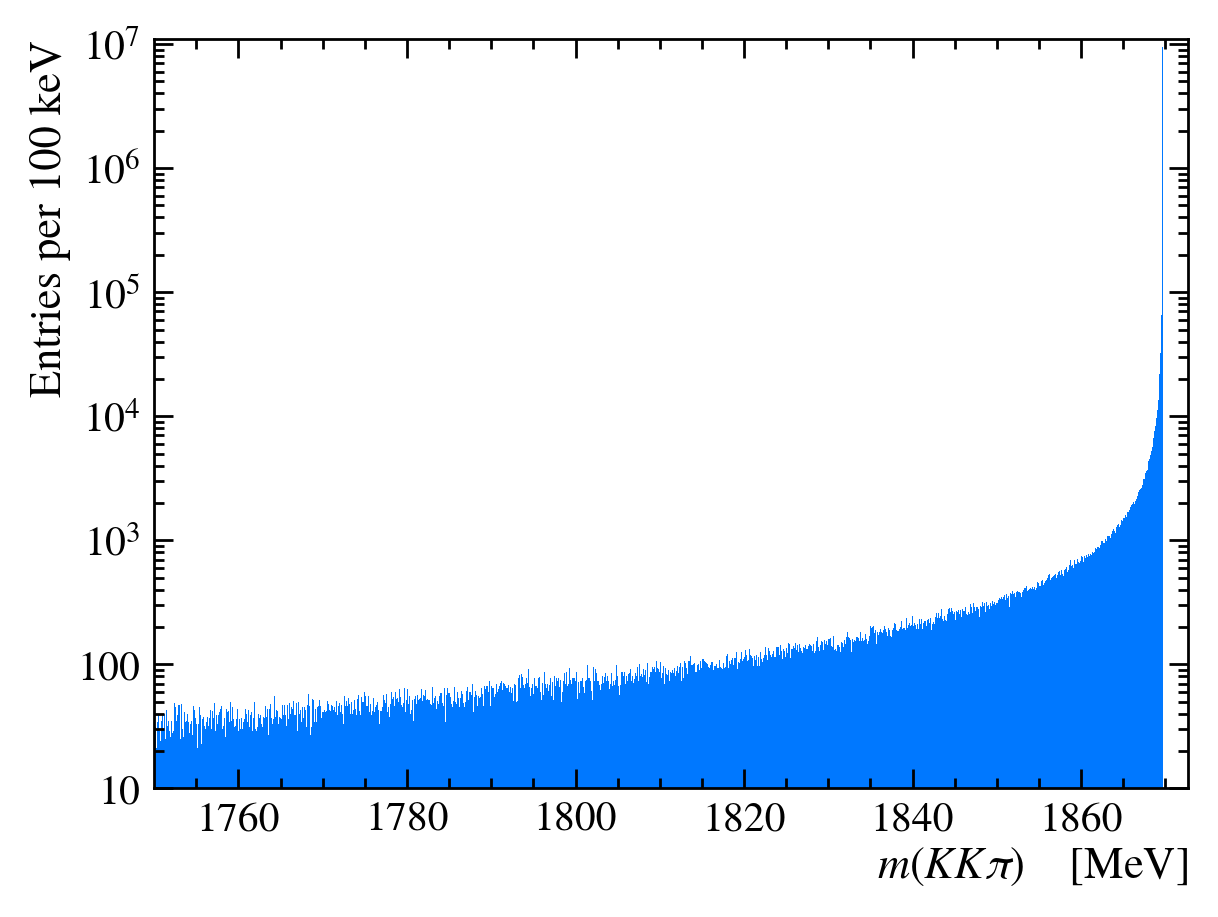

In [6]:
nC, bins, blas = plt.hist(Dp_mother_mass, range=(1750, np.max(Dp_mother_mass)),bins=1200)
plt.ylabel(f'Entries per 100 keV')
plt.xlabel('$m(K K \pi)$    [MeV]')
plt.yscale('log')
plt.axis([1750,np.max(Dp_mother_mass)+3,10,1.15*np.max(nC)])
plt.show()

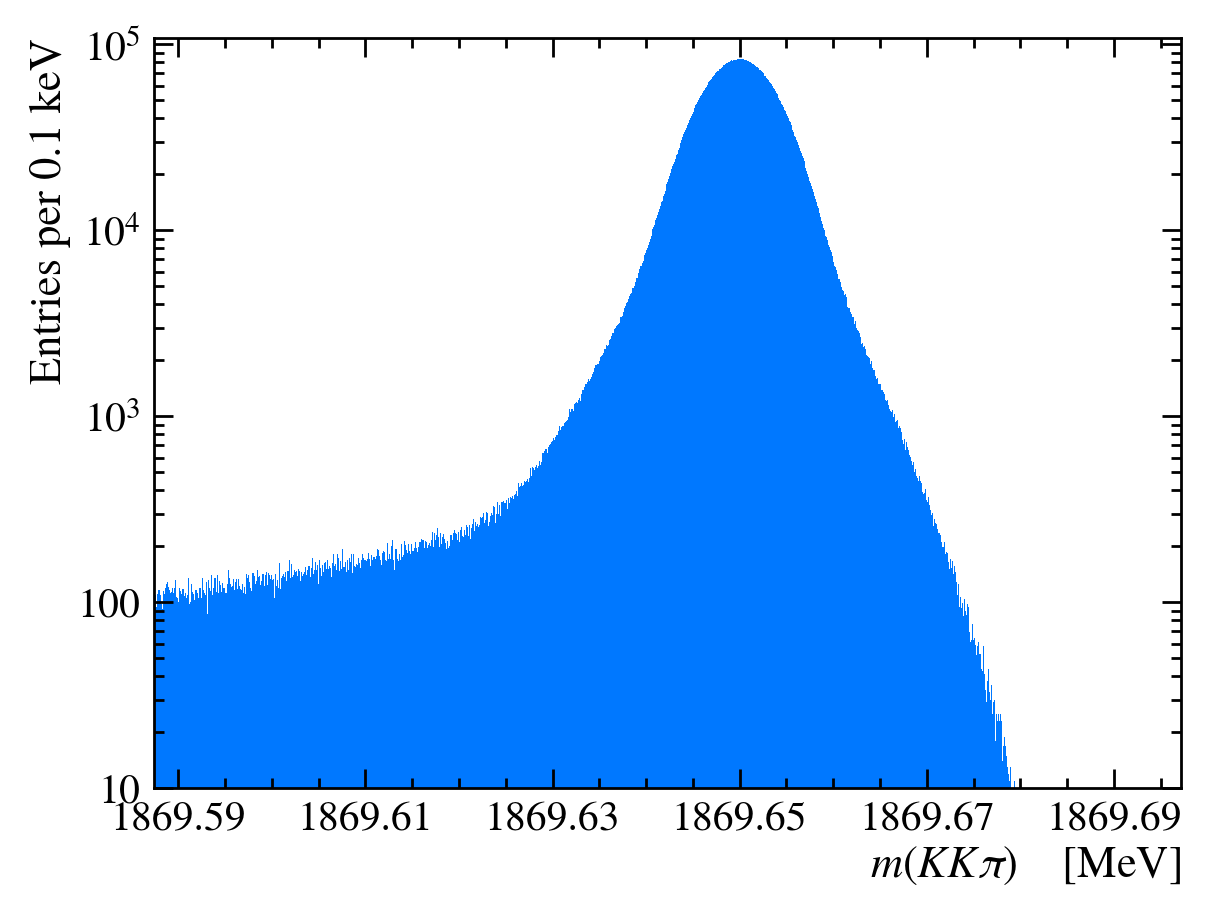

In [7]:
nC,a,b = plt.hist(Dp_mother_mass, range=(bins[-2], np.max(Dp_mother_mass)),bins=1000)
plt.ylabel(f'Entries per 0.1 keV')
plt.xlabel('$m(K K \pi)$    [MeV]')
plt.yscale('log')
plt.axis([bins[-2],np.max(Dp_mother_mass)+.01,10,1.3*np.max(nC)])
plt.xticks([1869.59,1869.61,1869.63,1869.65,1869.67,1869.69])
try:
    plt.ticklabel_format(useOffset=False)
except:
    print()
plt.show()

Define hyperbolic tan binning

In [8]:
def tanh_bin(bin_c,bin_min,bin_max, scale,assymtote):
    b = (bin_max-bin_min-assymtote*bin_c)/np.tanh(bin_c/scale)
    return bin_min + b*np.tanh(np.arange(0,bin_c+1)/scale) + assymtote * np.arange(0,bin_c+1)

Hyperbolic Tan binning variation

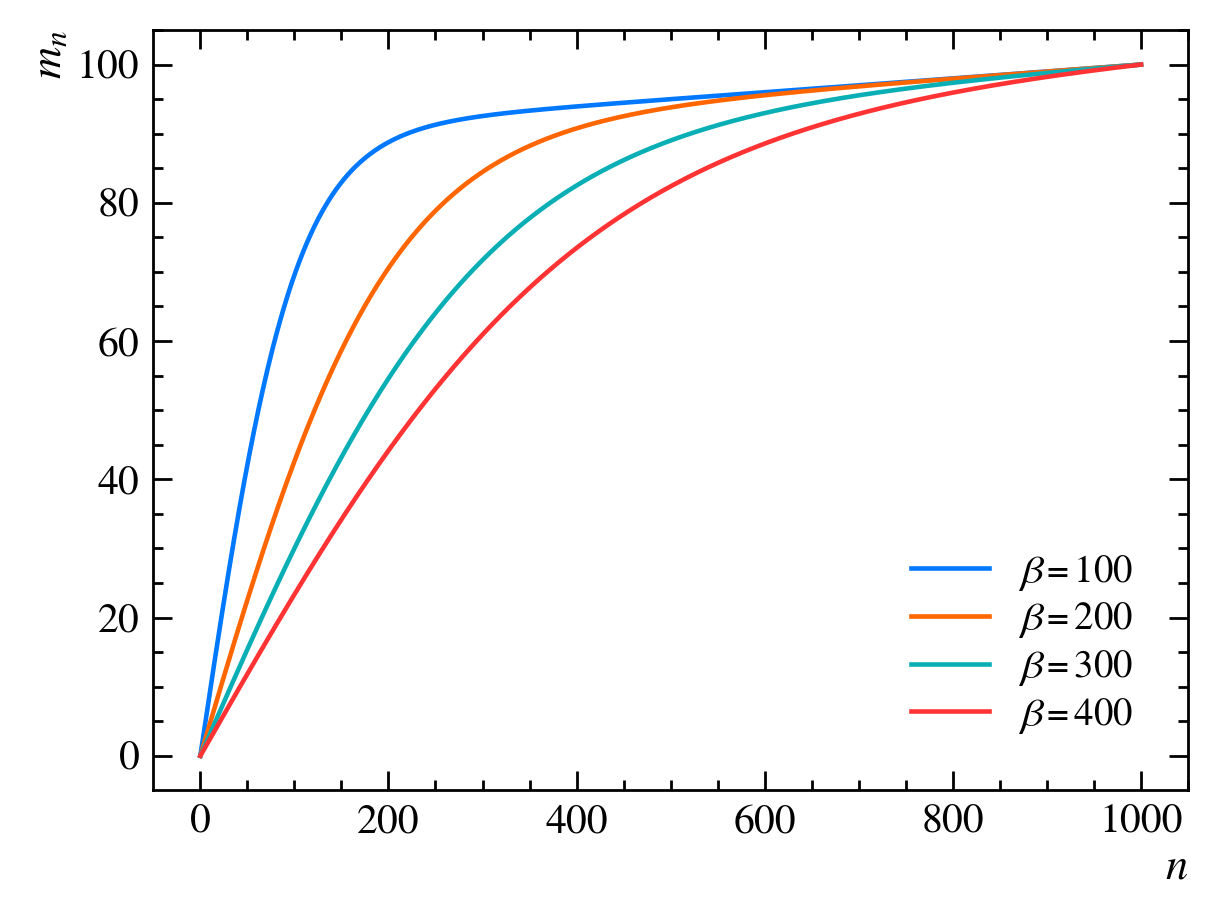

In [9]:
plt.plot(tanh_bin(1000, 0, 100, 100,0.01),label=r"$\beta=100$")
plt.plot(tanh_bin(1000, 0, 100, 200,0.01),label=r"$\beta=200$")
plt.plot(tanh_bin(1000, 0, 100, 300,0.01),label=r"$\beta=300$")
plt.plot(tanh_bin(1000, 0, 100, 400,0.01),label=r"$\beta=400$")
plt.xlabel(r"$n$")
plt.ylabel(r"$m_n$")
plt.legend()

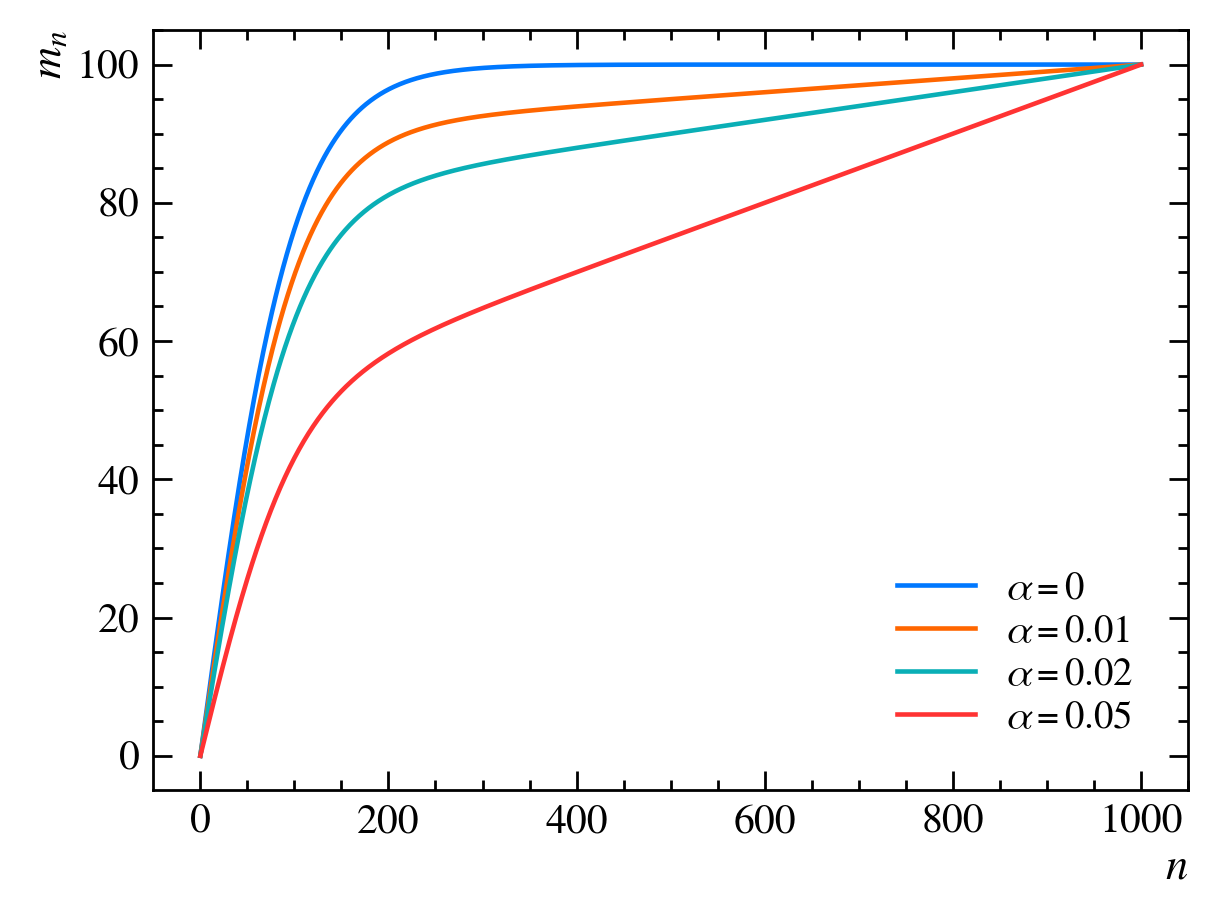

In [10]:
plt.plot(tanh_bin(1000, 0, 100, 100,0),label=r"$\alpha=0$")
plt.plot(tanh_bin(1000, 0, 100, 100,0.01),label=r"$\alpha=0.01$")
plt.plot(tanh_bin(1000, 0, 100, 100,0.02),label=r"$\alpha=0.02$")
plt.plot(tanh_bin(1000, 0, 100, 100,0.05),label=r"$\alpha=0.05$")
plt.xlabel(r"$n$")
plt.ylabel(r"$m_n$")
plt.legend()

Binning of the PHOTOS distribution

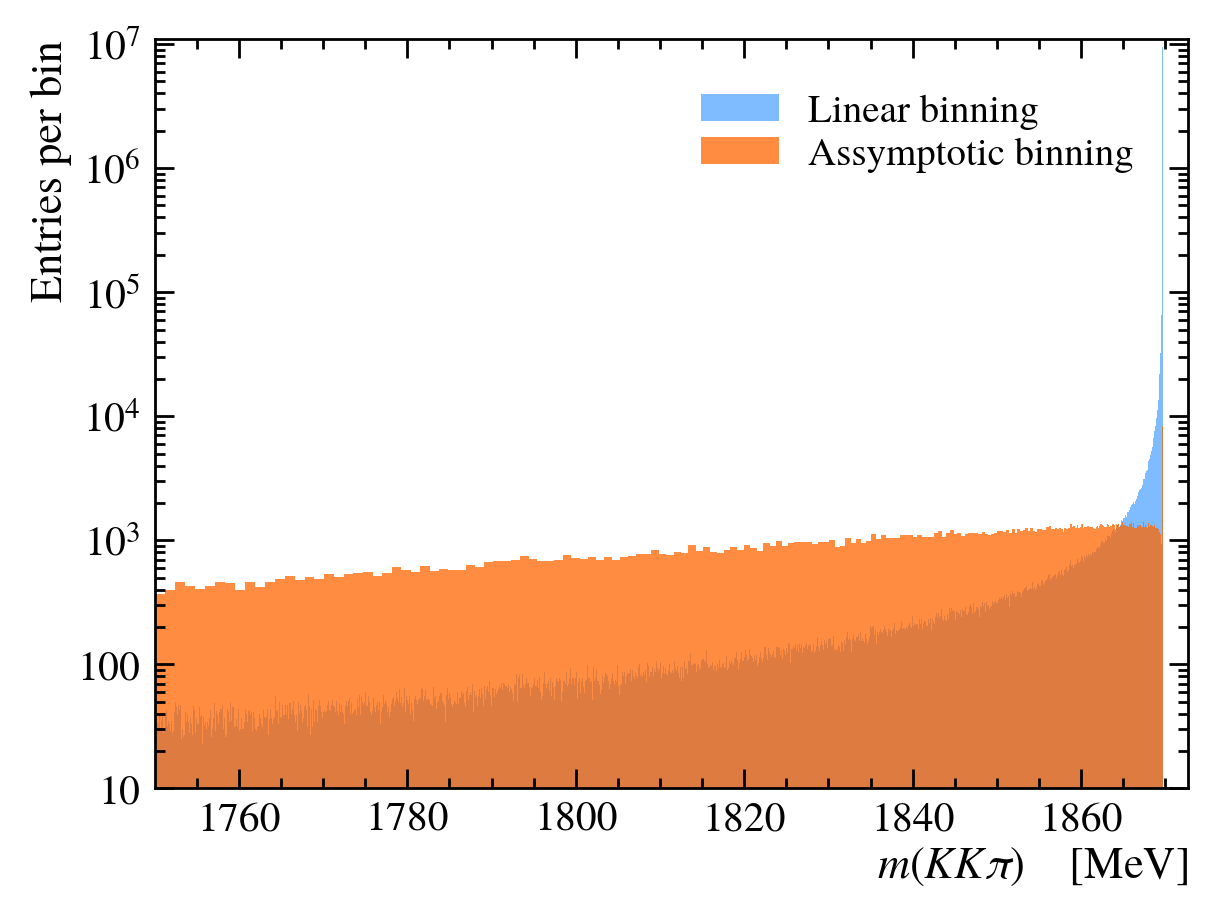

In [11]:
nC, bins, blas = plt.hist(Dp_mother_mass, label="Linear binning", range=(1750, np.max(Dp_mother_mass)),bins=1200, alpha=0.5)
plt.hist(Dp_mother_mass, label="Assymptotic binning", bins=tanh_bin(1200, 1750, np.max(Dp_mother_mass), 100,0.0001), alpha=0.75)
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$    [MeV]')
plt.yscale('log')
plt.axis([1750,np.max(Dp_mother_mass)+3,10,1.15*np.max(nC)])
plt.legend()
plt.show()

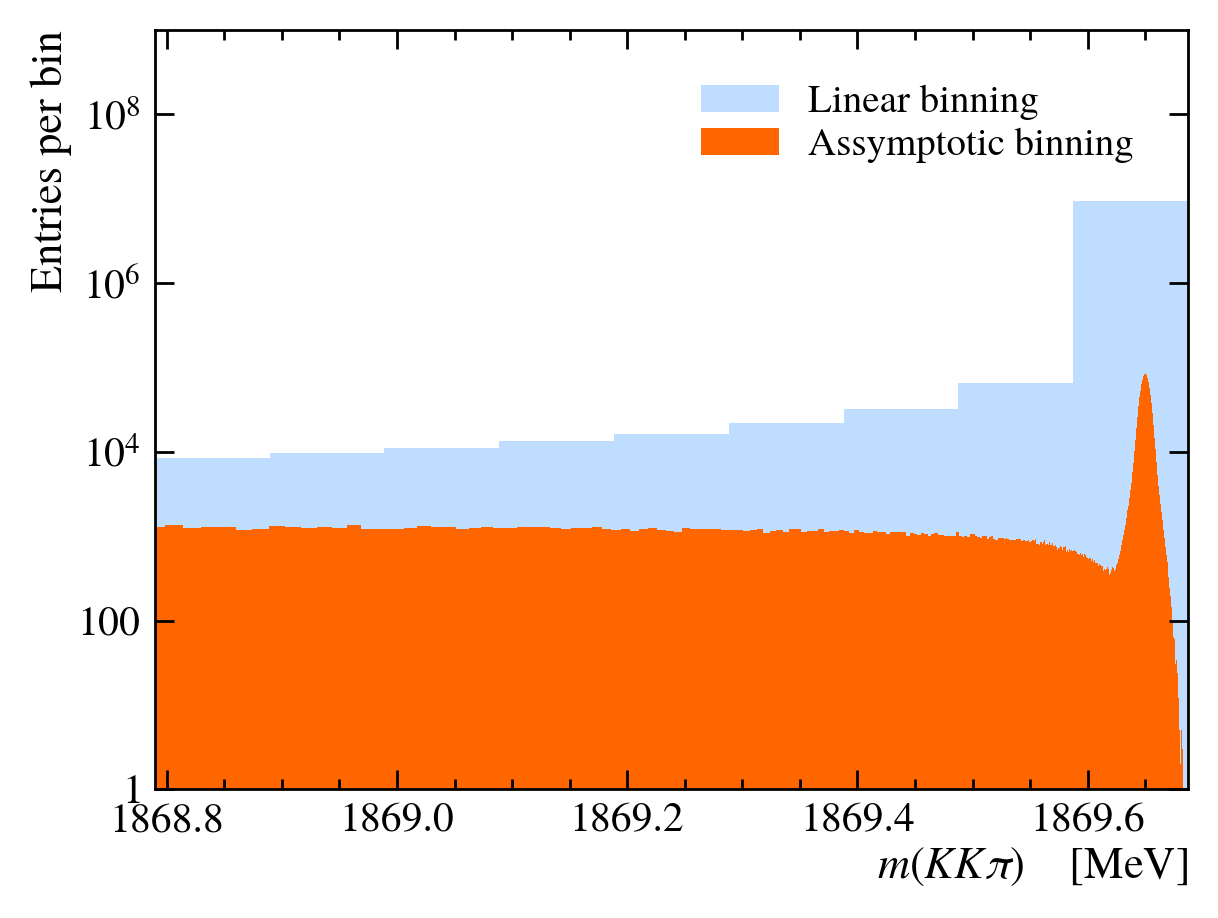

In [12]:
plt.hist(Dp_mother_mass, label="Linear binning", range=(1750, np.max(Dp_mother_mass)), bins=1200,alpha=0.25)
plt.hist(Dp_mother_mass, label="Assymptotic binning", bins=tanh_bin(1200, 1750, np.max(Dp_mother_mass), 100,0.0001))
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$    [MeV]')
plt.legend()
plt.axis([bins[-10],np.max(Dp_mother_mass), 1,10**9])
plt.yscale('log')

save the data

In [38]:
counts, edges = np.histogram(Dp_mother_mass, bins=tanh_bin(1200, 1750, np.max(Dp_mother_mass), 100,0.0001))
centers = (edges[1:] + edges[:-1]) / 2
np.save('../data/mc/histograms/Dp.npy', np.array([centers,counts]))

In [13]:
counts, edges = np.histogram(Ds_mother_mass, bins=tanh_bin(1200, 1750, np.max(Ds_mother_mass), 100,0.0001))
centers = (edges[1:] + edges[:-1]) / 2
np.save('../data/mc/histograms/Ds.npy', np.array([centers,counts]))

now for kpp + comparisons

In [28]:
kpipi_tree=uproot.open("../data/mc/raw/kpp.root")["Truth"]["t"]

In [29]:
kpipi_K_TRUEP_E = np.asarray(kpipi_tree["K_TRUEP_E"])
kpipi_K_TRUEP_X = np.asarray(kpipi_tree["K_TRUEP_X"])
kpipi_K_TRUEP_Y = np.asarray(kpipi_tree["K_TRUEP_Y"])
kpipi_K_TRUEP_Z = np.asarray(kpipi_tree["K_TRUEP_Z"])

kpipi_pi1_TRUEP_E = np.asarray(kpipi_tree["pi1_TRUEP_E"])
kpipi_pi1_TRUEP_X = np.asarray(kpipi_tree["pi1_TRUEP_X"])
kpipi_pi1_TRUEP_Y = np.asarray(kpipi_tree["pi1_TRUEP_Y"])
kpipi_pi1_TRUEP_Z = np.asarray(kpipi_tree["pi1_TRUEP_Z"])

kpipi_pi2_TRUEP_E = np.asarray(kpipi_tree["pi2_TRUEP_E"])
kpipi_pi2_TRUEP_X = np.asarray(kpipi_tree["pi2_TRUEP_X"])
kpipi_pi2_TRUEP_Y = np.asarray(kpipi_tree["pi2_TRUEP_Y"])
kpipi_pi2_TRUEP_Z = np.asarray(kpipi_tree["pi2_TRUEP_Z"])
kpipi_TRUEP_E = np.asarray(kpipi_tree["Dp_TRUEP_E"])
kpipi_TRUEP_X = np.asarray(kpipi_tree["Dp_TRUEP_X"])
kpipi_TRUEP_Y = np.asarray(kpipi_tree["Dp_TRUEP_Y"])
kpipi_TRUEP_Z = np.asarray(kpipi_tree["Dp_TRUEP_Z"])

kpipi_K_vec   = vector.array({"px": kpipi_K_TRUEP_X, "py":kpipi_K_TRUEP_Y, "pz":kpipi_K_TRUEP_Z, "E":kpipi_K_TRUEP_E})
kpipi_pi1_vec   = vector.array({"px": kpipi_pi1_TRUEP_X, "py":kpipi_pi1_TRUEP_Y, "pz":kpipi_pi1_TRUEP_Z, "E":kpipi_pi1_TRUEP_E})
kpipi_pi2_vec  = vector.array({"px": kpipi_pi2_TRUEP_X, "py":kpipi_pi2_TRUEP_Y, "pz":kpipi_pi2_TRUEP_Z, "E":kpipi_pi2_TRUEP_E})
kpipi_true_vec  = vector.array({"px": kpipi_TRUEP_X, "py":kpipi_TRUEP_Y, "pz":kpipi_TRUEP_Z, "E":kpipi_TRUEP_E})
kpipi_mother_vec = kpipi_K_vec + kpipi_pi1_vec + kpipi_pi2_vec
kpipi_mother_mass = kpipi_mother_vec.mass
kpipi_true_mass = kpipi_true_vec.mass

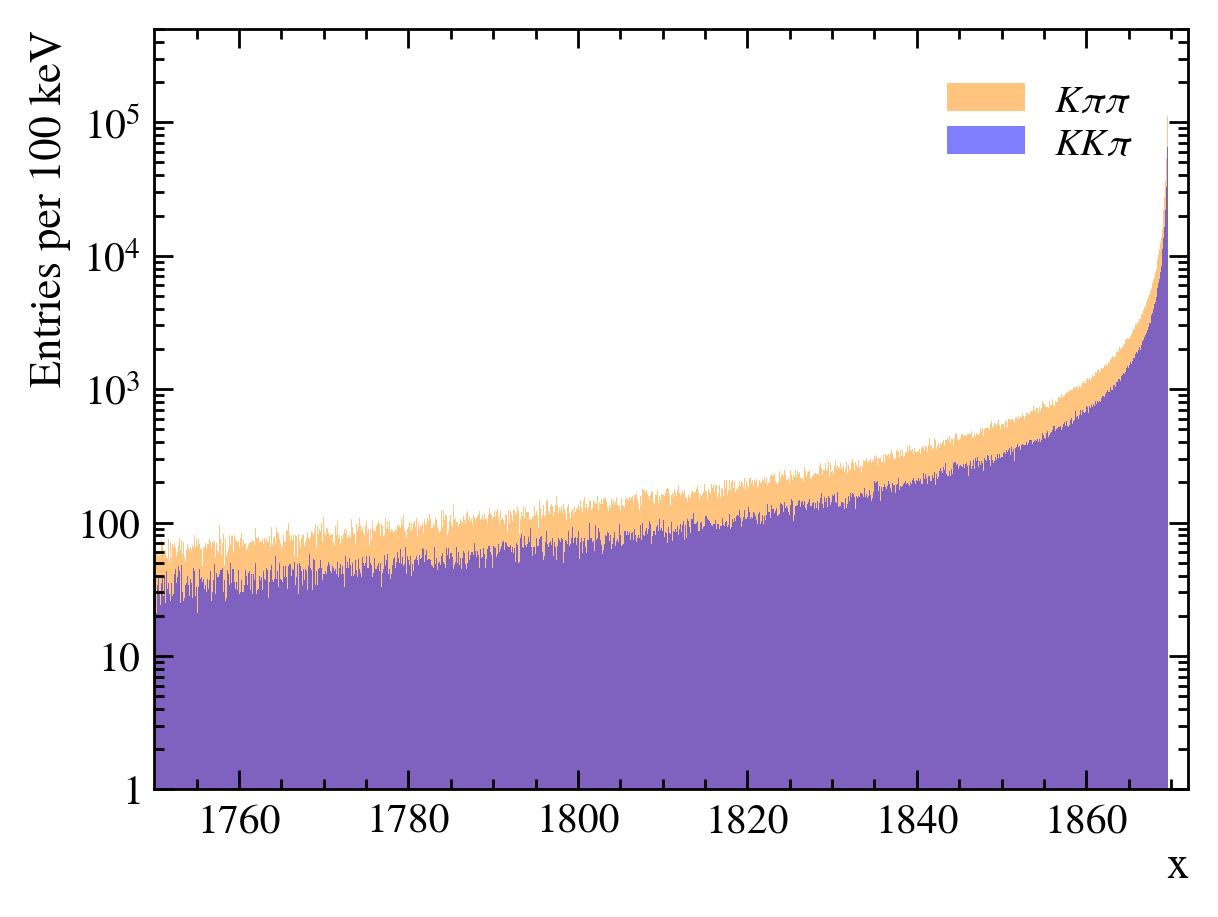

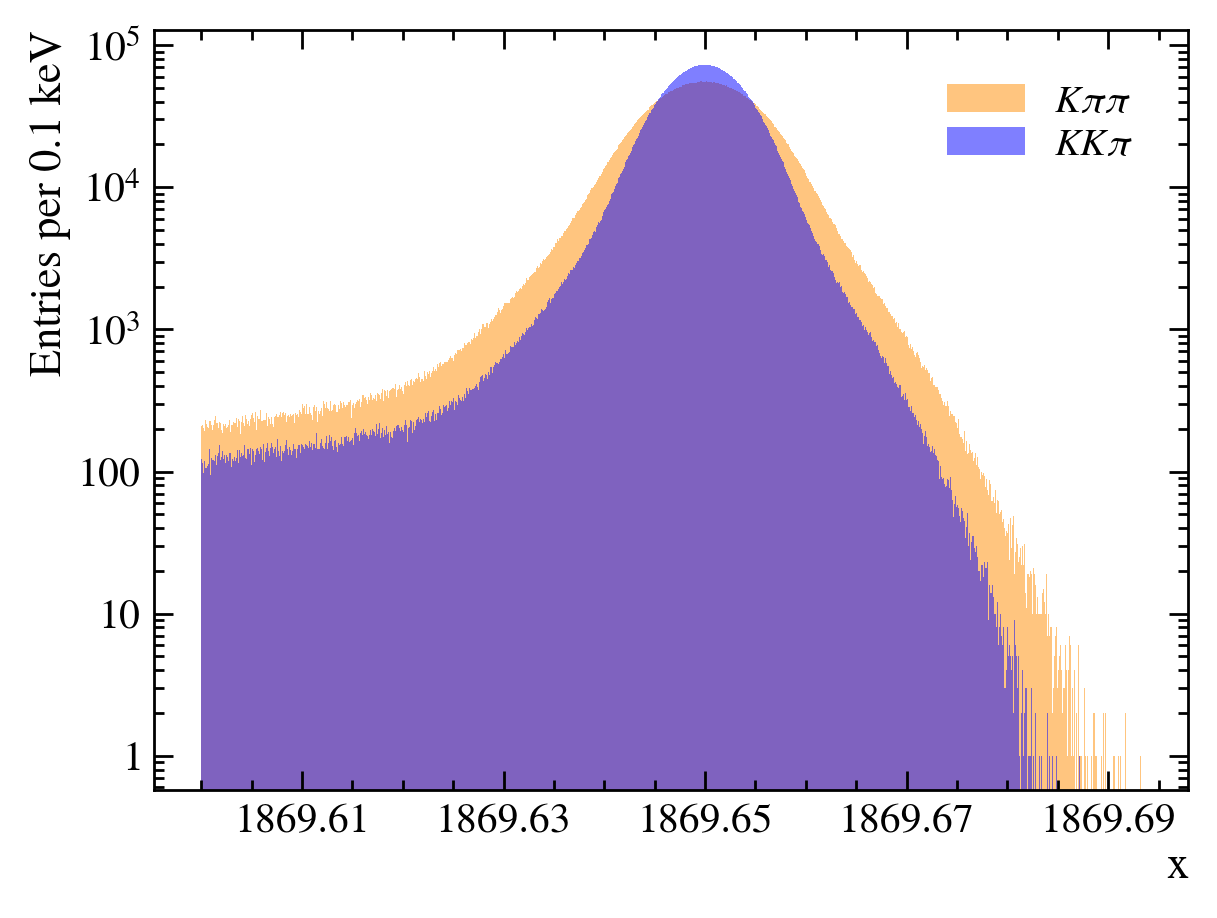

In [31]:
import matplotlib
x=np.linspace(-5,5,1000)
fig, ax1 = plt.subplots()


ax1.hist(kpipi_mother_mass, bins=1200, range=(1750,np.max(kpipi_mother_mass)),color='darkorange',alpha=0.5, label='$K\pi\pi$')
ax1.hist(Dp_mother_mass, bins=1200, range=(1750,np.max(Dp_mother_mass)),color='blue',alpha=0.5, label='$KK\pi$')
ax1.axis([1750,1872,1,5*10**5])
ax1.set(xlabel='x',ylabel='Entries per 100 keV', yscale='log')
ax1.legend()
fig.show()

fig, ax2 = plt.subplots()

ax2.hist(kpipi_mother_mass, bins=1000, range=(1869.6,np.max(kpipi_mother_mass)),color='darkorange',alpha=0.5, label='$K\pi\pi$')
ax2.hist(Dp_mother_mass, bins=1000, range=(1869.6,np.max(Dp_mother_mass)),color='blue',alpha=0.5, label='$KK\pi$')
ax2.set(xlabel='x', ylabel='Entries per 0.1 keV', yscale='log', xticks=[1869.61,1869.63,1869.65,1869.67,1869.69])
ax2.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x))))
ax2.legend()
fig.show()

In [40]:
counts, edges = np.histogram(kpipi_mother_mass, bins=tanh_bin(1200, 1750, np.max(Dp_mother_mass), 100,0.0001))
centers = (edges[1:] + edges[:-1]) / 2
np.save('../data/mc/histograms/kpp.npy', np.array([centers,counts]))

## Convolution

In [2]:
Dp_dx, Dp_c = np.load("../data/mc/histograms/Dp.npy")

In [4]:
i = fl.index(len(Dp_c))
model = fl.convolve(i,Dp_dx,Dp_c,1869.65, 0, 1)

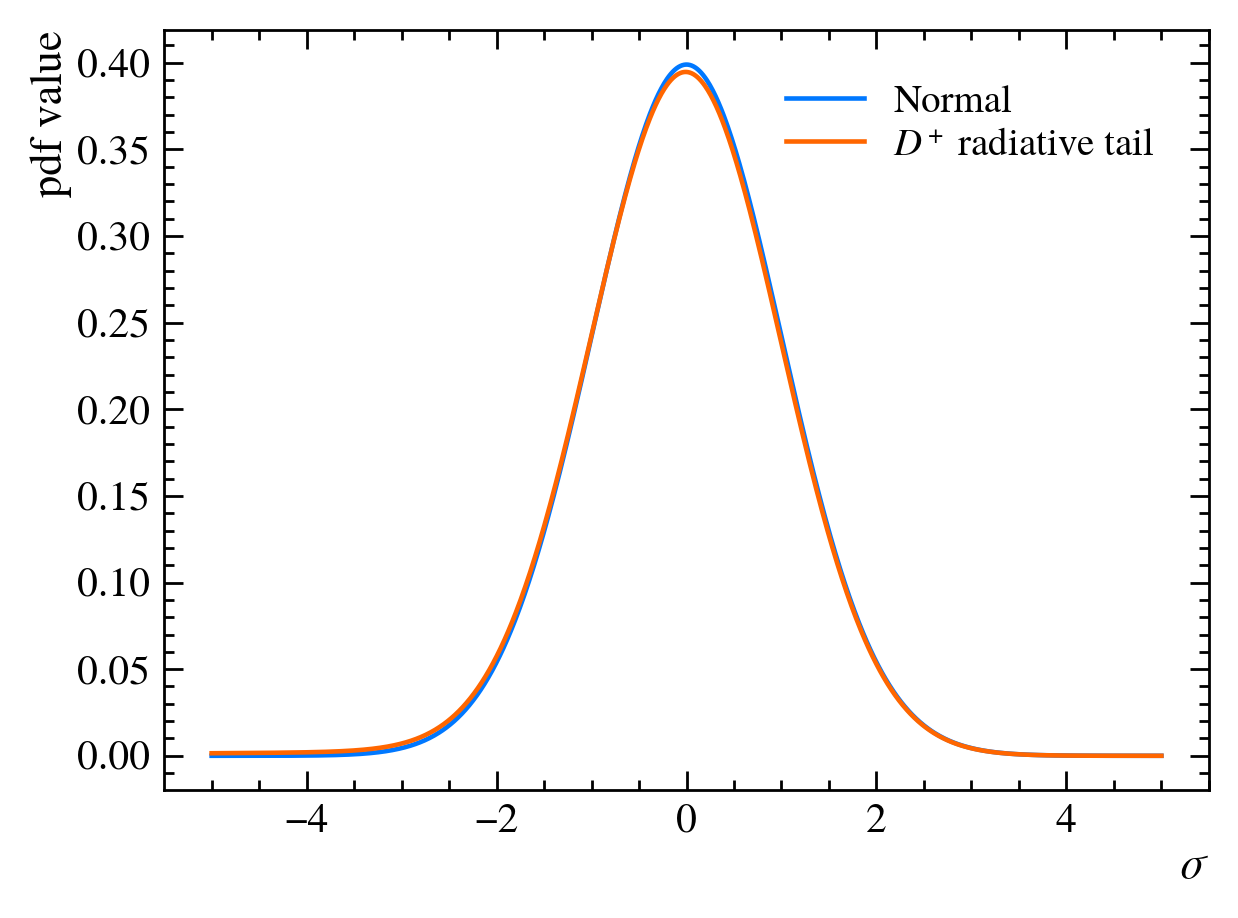

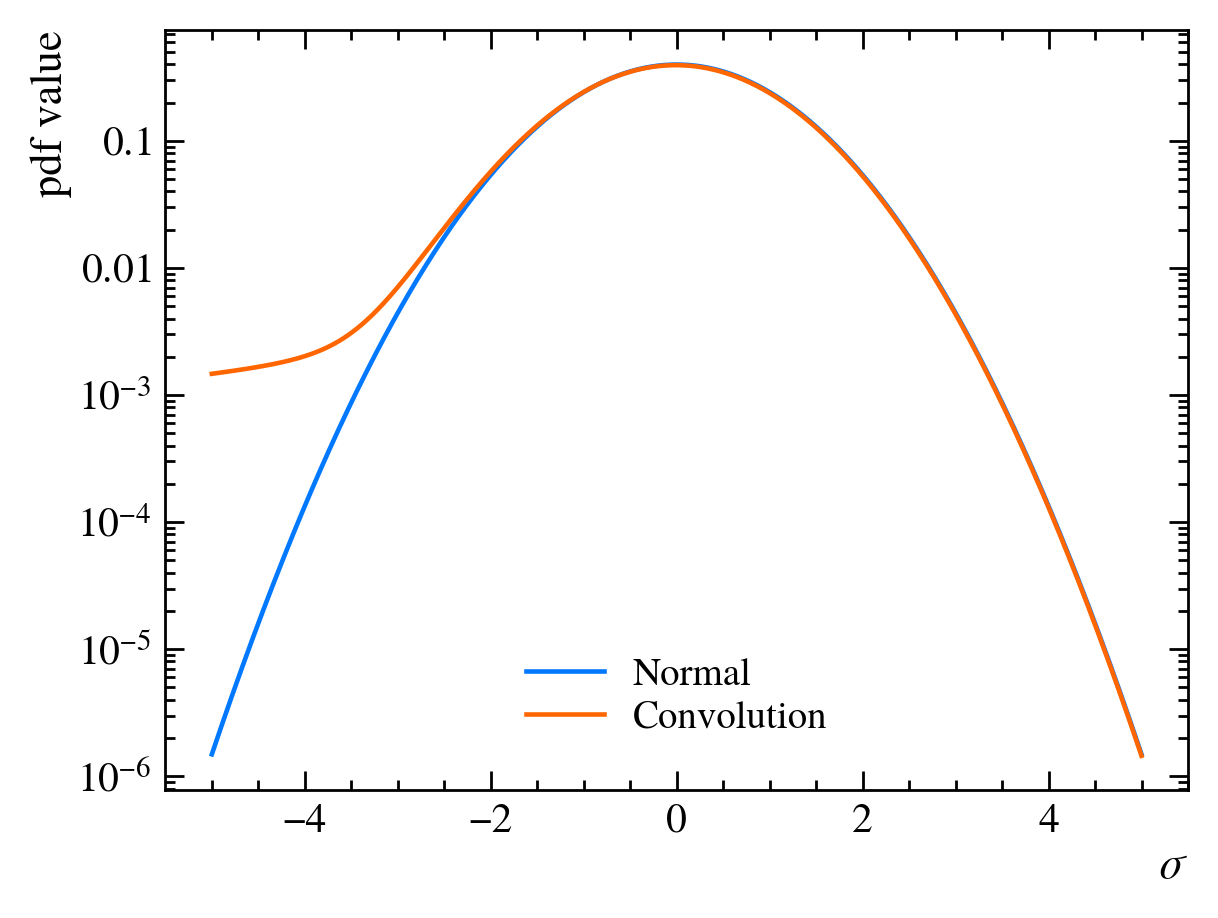

In [56]:
x=np.linspace(-5,5,1000)
plt.plot(x,scipy.stats.norm.pdf(x,0,1), label="Normal")
plt.plot(x,model(x), label="$D^+$ radiative tail")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"pdf value")
plt.legend()
plt.show()

plt.plot(x,scipy.stats.norm.pdf(x,0,1), label="Normal")
plt.plot(x,model(x), label="Convolution")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"pdf value")
plt.yscale('log')
plt.legend()

## Comparison of Binning in Fitting

In [102]:
def sample():
    raw_data_dp = np.random.choice(Dp_mother_mass, size=800000) + np.multiply(np.random.choice(Dp_DTF_MERR,800000),np.random.randn(800000)) 
    raw_data_ds = np.random.choice(Ds_mother_mass, size=1000000) + np.multiply(np.random.choice(Dp_DTF_MERR,1000000),np.random.randn(1000000))
    background = np.random.exponential(150, 60000)+1840
    return np.concatenate([raw_data_dp,raw_data_ds,background])

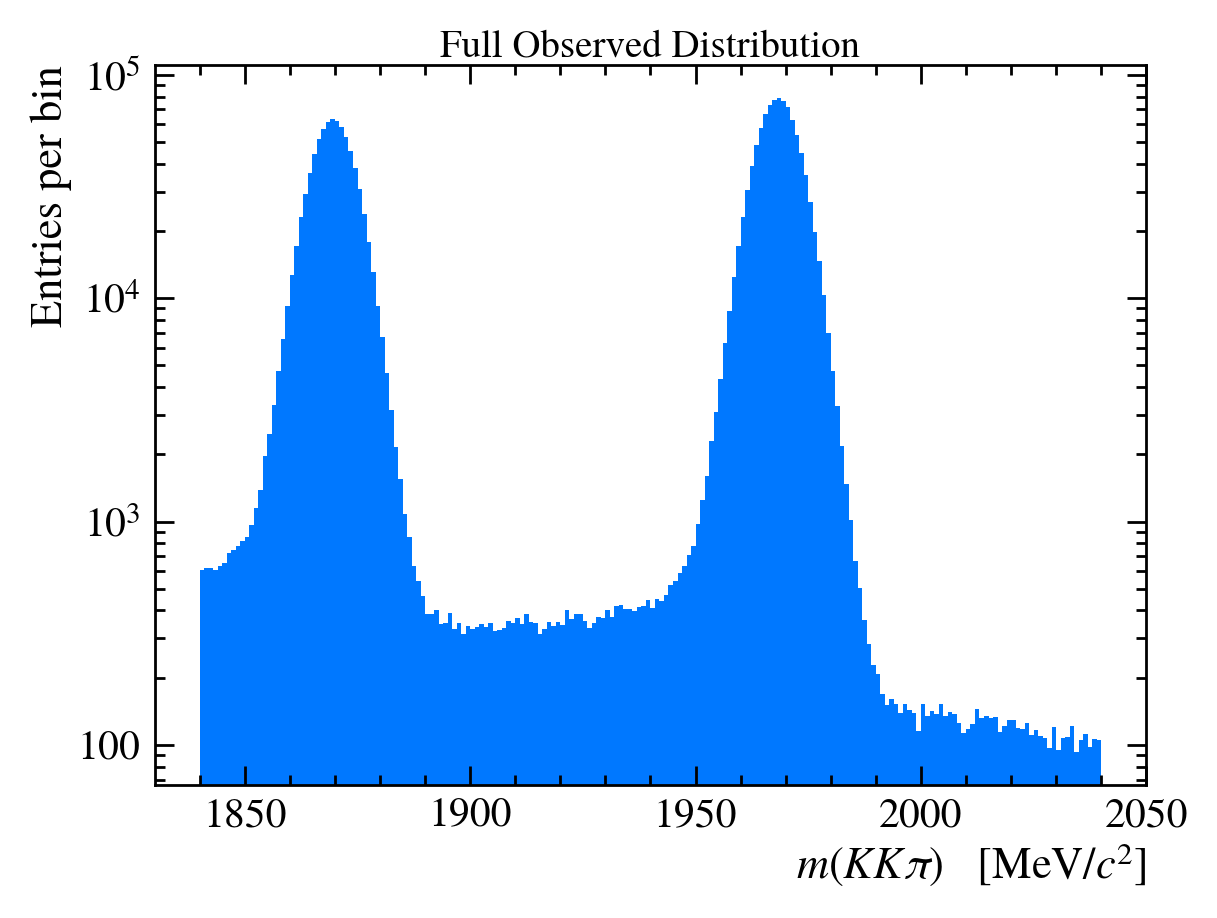

In [103]:
observed_full = sample()
plt.hist(observed_full,bins=200,range=(1840,2040))
plt.yscale('log')
plt.title('Full Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

In [127]:
#observed_full = Dp_M[very_clean_cuts]
observed_full = sample()

In [195]:
def convolution_fit(data, Dp_x, Dp_c, Ds_x, Ds_c):
    i = fl.index(len(Dp_c))
    conv1_mass2 = fl.Param(1970)('mass')
    conv1_mass1 = conv1_mass2 - fl.Param(100)('mass_diff')
    conv1_Dp = fl.Param.positive(500000)* fl.convolve(i,Dp_x,Dp_c,1869.65, conv1_mass1, fl.Param.positive(5))+fl.Param.positive(500000)* fl.convolve(i, Dp_x,Dp_c,1869.65, conv1_mass1, fl.Param.positive(10))
    conv1_Ds = fl.Param.positive(500000)* fl.convolve(i,Ds_x,Ds_c,1968.33, conv1_mass2, fl.Param.positive(5))+fl.Param.positive(500000)* fl.convolve(i, Ds_x,Ds_c,1968.33, conv1_mass2, fl.Param.positive(10))
    conv1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1840)
    conv1 = conv1_Dp+conv1_Ds+conv1_tail
    #return conv1
    return fl.fit(conv1 | fl.Cost.chi2(data, 200, zero_method='absolute'), numba=True)

In [196]:
linear_dp_c, linear_dp_centers = np.histogram(Dp_mother_mass, 1200)
linear_ds_c, linear_ds_centers = np.histogram(Ds_mother_mass, 1200)
linear_dp_dx = (linear_dp_centers[1:] + linear_dp_centers[:-1])/2
linear_ds_dx = (linear_ds_centers[1:] + linear_ds_centers[:-1])/2

3572582920908722652

In [197]:
convolution_fit(observed_full, linear_dp_dx, linear_dp_c, linear_ds_dx, linear_ds_c)

Compiling model sum(((const_140148412030768()) - (5e+05 * ((add_reduce((indecise(const_140148412027792(), range(0, 1200))) * (1 / (5 * 2.5066282746310002) * (exp(-0.5 * (((const_140148946631728()) + 1869.65 - (mass=1970 - mass_diff=100) - (indecise(const_140148408543440(), range(0, 1200)))) / 5) ** 2))), index=range(0, 1200))) / (((indecise(const_140148946631728(), 1)) - (indecise(const_140148946631728(), 0))) * (sum(add_reduce((indecise(const_140148412027792(), range(0, 1200))) * (1 / (5 * 2.5066282746310002) * (exp(-0.5 * (((const_140148946631728()) + 1869.65 - (mass=1970 - mass_diff=100) - (indecise(const_140148408543440(), range(0, 1200)))) / 5) ** 2))), index=range(0, 1200)))))) + 5e+05 * ((add_reduce((indecise(const_140148412027792(), range(0, 1200))) * (1 / (10 * 2.5066282746310002) * (exp(-0.5 * (((const_140148946631728()) + 1869.65 - (mass=1970 - mass_diff=100) - (indecise(const_140148408543440(), range(0, 1200)))) / 10) ** 2))), index=range(0, 1200))) / (((indecise(const_1401

KeyboardInterrupt: 

In [187]:
model(np.array([1868,1900,]))

array([43197.4693772 , 19824.36877382])

In [164]:
model.code

In [158]:
model.code

AttributeError: 'Model' object has no attribute 'code'

In [157]:
fl.Model._compiled_cache

{}

In [13]:
conv_linear = fitlib.Fitter.binned(observed_full,200, range=(1840,2040))
conv_linear.mu1 = fitlib.f(1850,1900)
conv_linear.mu_diff = fitlib.f(0,200)
conv_linear.pdf = [
    bin_linear_dp.pdf(mu=conv_linear.mu1),bin_linear_dp.pdf(mu=conv_linear.mu1),
    bin_linear_ds.pdf(mu=conv_linear.mu1 + conv_linear.mu_diff),bin_linear_ds.pdf(mu=conv_linear.mu1 + conv_linear.mu_diff),
    fitlib.Exp(x0=1840)
]
conv_linear.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 167.8                      │             Nfcn = 2149              │
│ EDM = 2.93e-05 (Goal: 0.0002)    │           time = 48.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.306e6  │  0.030e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.869883e3 │0.000006e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │   6.18    │   0.10    │            │            │    0    │         │       │
│ 3 │ x3   │  0.485e6  │  0.030e6  │            │            │    1    │         │       │
│ 4 │ x4   │   4.42    │   0.05    │            │            │    0    │         │       │
│ 5 │ x5   │  0.639e6  │  0.028e6  │            │            │    1    │         │       │
│ 6 │ x6   │  98.720   │   0.008   │            │            │    0    │   200   │       │
│ 7 │ x7   │   4.47    │   0.04    │            │            │    0    │         │       │
│ 8 │ x8   │  0.358e6  │  0.028e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.25    │   0.07    │            │            │    0    │         │       │
│ 10│ x10  │  60.8e3   │   0.6e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   147.5   │    2.8    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12 │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     9.21e+08      2.55288  -2.949598e3       -0.9e9 -1.5858002e3           -0     -1.56703     -14.3231            0      -39.415       0.51e6            0    -22.310e3 │
│  x1 │      2.55288     3.63e-05     -0.01e-3     -2.61391           -0    267.01e-3     -0.04e-3            0   -274.12e-3            0    -57.10e-3            0     -0.77e-3 │
│  x2 │  -2.949598e3     -0.01e-3      0.00978   2.961745e3       0.0049       46.232      0.01e-3       0.0001      -44.563        0.000       -1.913         0.00        0.086 │
│  x3 │       -0.9e9     -2.61391   2.961745e3     9.27e+08  1.5907051e3            0      1.60867      14.5587           -0       40.066      -0.52e6            0     22.752e3 │
│  x4 │ -1.5858002e3           -0       0.0049  1.5907051e3      0.00284      18.8197            0       0.0000     -18.1475       0.0001      -0.8002       0.0000       0.0346 │
│  x5 │           -0    267.01e-3       46.232            0      18.8197     7.61e+08   -372.65e-3  1.0513033

In [16]:
sorted_dp = np.sort(Dp_mother_mass[Dp_mother_mass > 1750])
dp_bmm = np.array_split(sorted_dp, 1200)
bin_equal_dp = fitlib.Convolution(Dp_mother_mass, 1869.65, np.array([dp_bmm[0][0]]+ [(dp_bmm[i+1][0]+dp_bmm[i][-1])/2 for i in range(len(dp_bmm)-1)]+[dp_bmm[-1][-1]]))

In [17]:
sorted_ds = np.sort(Ds_mother_mass[Ds_mother_mass > 1750])
ds_bmm = np.array_split(sorted_ds, 1200)
bin_equal_ds = fitlib.Convolution(Ds_mother_mass, 1869.65, np.array([ds_bmm[0][0]]+ [(ds_bmm[i+1][0]+ds_bmm[i][-1])/2 for i in range(len(ds_bmm)-1)]+[ds_bmm[-1][-1]]))

In [18]:
conv_equal = fitlib.Fitter.binned(observed_full,200, range=(1840,2040))
conv_equal.mu1 = fitlib.f(1850,1900)
conv_equal.mu_diff = fitlib.f(0,200)
conv_equal.pdf = [
    bin_equal_dp.pdf(mu=conv_equal.mu1),bin_equal_dp.pdf(mu=conv_equal.mu1),
    bin_equal_ds.pdf(mu=conv_equal.mu1 + conv_equal.mu_diff),bin_equal_ds.pdf(mu=conv_equal.mu1 + conv_equal.mu_diff),
    fitlib.Exp(x0=1840)
]
conv_equal.chi2(100000)

/data/home/twarner/convolution/fitlib/convolution.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  return (n / integral) * dist
/data/home/twarner/convolution/fitlib/convolution.py:45: RuntimeWarning: invalid value encountered in multiply
  return (n / integral) * dist


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1488                       │             Nfcn = 4188              │
│ EDM = 6.07e-05 (Goal: 0.0002)    │           time = 69.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │ 476.88e3  │  0.12e3   │            │            │    1    │         │       │
│ 1 │ x1   │1.869640e3 │0.000006e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │   4.404   │   0.011   │            │            │    0    │         │       │
│ 3 │ x3   │ 314.88e3  │  0.12e3   │            │            │    1    │         │       │
│ 4 │ x4   │   6.165   │   0.018   │            │            │    0    │         │       │
│ 5 │ x5   │  16.5e3   │   0.8e3   │            │            │    1    │         │       │
│ 6 │ x6   │   0.006   │   0.008   │            │            │    0    │   200   │       │
│ 7 │ x7   │   11.19   │   0.20    │            │            │    0    │         │       │
│ 8 │ x8   │ 997.62e3  │  0.21e3   │            │            │    1    │         │       │
│ 9 │ x9   │   5.035   │   0.005   │            │            │    0    │         │       │
│ 10│ x10  │  61.94e3  │  0.11e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   158.0   │    2.4    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     1.4e+04    12.75e-3   -17.08e-3     0.014e6    -1.42e-3    -0.095e6    -7.09e-3       15.69     0.025e6  329.700e-3    -0.013e6           0         -49 │
│  x1 │    12.75e-3    3.61e-05           0    12.89e-3          -0   -78.29e-3    -0.04e-3     0.01e-3    49.96e-3           0     0.62e-3           0    -0.46e-3 │
│  x2 │   -17.08e-3           0    0.000114   -17.22e-3    -0.14e-3   112.98e-3          -0    -0.06e-3   -41.97e-3   -0.001e-3    10.51e-3           0    -4.97e-3 │
│  x3 │     0.014e6    12.89e-3   -17.22e-3    1.41e+04    -1.40e-3    -0.096e6    -7.19e-3       15.79     0.025e6  331.875e-3    -0.013e6           0         -49 │
│  x4 │    -1.42e-3          -0    -0.14e-3    -1.40e-3    0.000312    15.89e-3           0     0.11e-3    16.62e-3           0     9.96e-3           0    16.63e-3 │
│  x5 │    -0.095e6   -78.29e-3   112.98e-3    -0.096e6    15.89e-3    6.51e+05    39.03e-3     -107.11     -0.17e6   -2.250468     0.087e6           0         334 │
│  x6 │    -7.09e-3    -0.04e-3          -0    

In [19]:
bin_piecewise_dp = fitlib.Convolution(Dp_mother_mass, 1869.65, 
    np.concatenate([np.linspace(1750,1869,300), np.linspace(1869,1869.4,400), np.linspace(1869.4,1869.7,500)]))
bin_piecewise_ds = fitlib.Convolution(Ds_mother_mass, 1968.33, 
    np.concatenate([np.linspace(1750,1967,300), np.linspace(1967,1968,400), np.linspace(1968,np.max(Ds_mother_mass),500)]))

In [20]:
conv_piecewise = fitlib.Fitter.binned(observed_full,200, range=(1840,2040))
conv_piecewise.mu1 = fitlib.f(1850,1900)
conv_piecewise.mu_diff = fitlib.f(0,200)
conv_piecewise.pdf = [
    bin_piecewise_dp.pdf(mu=conv_piecewise.mu1),bin_piecewise_dp.pdf(mu=conv_piecewise.mu1),
    bin_piecewise_ds.pdf(mu=conv_piecewise.mu1 + conv_piecewise.mu_diff),bin_piecewise_ds.pdf(mu=conv_piecewise.mu1 + conv_piecewise.mu_diff),
    fitlib.Exp(x0=1840)
]
conv_piecewise.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 167                        │             Nfcn = 1694              │
│ EDM = 6.17e-06 (Goal: 0.0002)    │           time = 28.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.487e6  │  0.030e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.869643e3 │0.000006e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │   4.43    │   0.05    │            │            │    0    │         │       │
│ 3 │ x3   │  0.304e6  │  0.030e6  │            │            │    1    │         │       │
│ 4 │ x4   │   6.18    │   0.10    │            │            │    0    │         │       │
│ 5 │ x5   │  0.636e6  │  0.028e6  │            │            │    1    │         │       │
│ 6 │ x6   │  98.682   │   0.008   │            │            │    0    │   200   │       │
│ 7 │ x7   │   4.46    │   0.04    │            │            │    0    │         │       │
│ 8 │ x8   │  0.360e6  │  0.028e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.24    │   0.07    │            │            │    0    │         │       │
│ 10│ x10  │  60.8e3   │   0.6e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   148.4   │    2.8    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12 │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     9.31e+08     -2.62012  1.5925435e3       -0.9e9   2.987913e3            0      1.60771      14.7814           -0       40.176      -0.47e6            0     23.210e3 │
│  x1 │     -2.62012     3.63e-05           -0      2.55936     -0.01e-3    264.89e-3     -0.04e-3            0   -272.14e-3            0    -58.41e-3            0     -0.78e-3 │
│  x2 │  1.5925435e3           -0      0.00284 -1.5876357e3       0.0050      19.0782            0       0.0000     -18.3989       0.0001      -0.7301       0.0000       0.0352 │
│  x3 │       -0.9e9      2.55936 -1.5876357e3     9.24e+08  -2.975675e3           -0     -1.56644     -14.5420            0      -39.523       0.47e6            0    -22.761e3 │
│  x4 │   2.987913e3     -0.01e-3       0.0050  -2.975675e3      0.00992       47.232      0.01e-3       0.0001      -45.534        0.000       -1.751         0.00        0.088 │
│  x5 │            0    264.89e-3      19.0782           -0       47.232      7.8e+08   -376.78e-3  1.0757170

In [21]:
tanh_dp = fitlib.Convolution([0], 1869.65, 1)
Dp_data = np.loadtxt("./data/Dp_histogram.csv", delimiter=",", skiprows=1)
tanh_dp.d_x = Dp_data[:, 0]
tanh_dp.c = Dp_data[:, 1]

In [22]:
tanh_ds = fitlib.Convolution([0], 1968.33, 1)
Ds_data = np.loadtxt("./data/Ds_histogram.csv", delimiter=",", skiprows=1)
tanh_ds.d_x = Ds_data[:, 0]
tanh_ds.c = Ds_data[:, 1]

In [23]:
conv = fitlib.Fitter.binned(observed_full,200, range=(1840,2040))
conv.mu1 = fitlib.f(1850,1900)
conv.mu_diff = fitlib.f(0,200)
conv.pdf = [
    tanh_dp.pdf(mu=conv.mu1),tanh_dp.pdf(mu=conv.mu1),
    tanh_ds.pdf(mu=conv.mu1 + conv.mu_diff),tanh_ds.pdf(mu=conv.mu1 + conv.mu_diff),
    fitlib.Exp(x0=1840)
]
conv.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 167                        │             Nfcn = 1616              │
│ EDM = 7.91e-05 (Goal: 0.0002)    │           time = 26.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.487e6  │  0.031e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.869643e3 │0.000006e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │   4.43    │   0.05    │            │            │    0    │         │       │
│ 3 │ x3   │  0.304e6  │  0.030e6  │            │            │    1    │         │       │
│ 4 │ x4   │   6.18    │   0.10    │            │            │    0    │         │       │
│ 5 │ x5   │  0.360e6  │  0.028e6  │            │            │    1    │         │       │
│ 6 │ x6   │  98.682   │   0.008   │            │            │    0    │   200   │       │
│ 7 │ x7   │   6.24    │   0.07    │            │            │    0    │         │       │
│ 8 │ x8   │  0.636e6  │  0.028e6  │            │            │    1    │         │       │
│ 9 │ x9   │   4.46    │   0.04    │            │            │    0    │         │       │
│ 10│ x10  │  60.8e3   │   0.6e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   148.4   │    2.8    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12 │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     9.34e+08     -2.63474  1.5986556e3       -0.9e9   2.997518e3           -0      1.61793       40.703            0      15.0329      -0.48e6            0     23.309e3 │
│  x1 │     -2.63474     3.63e-05           -0      2.57395     -0.01e-3   -270.33e-3     -0.04e-3            0    263.08e-3            0    -58.39e-3            0     -0.78e-3 │
│  x2 │  1.5986556e3           -0      0.00285 -1.5937252e3       0.0050     -18.7262            0       0.0001      19.4091       0.0000      -0.7348       0.0000       0.0354 │
│  x3 │       -0.9e9      2.57395 -1.5937252e3     9.28e+08  -2.985245e3            0     -1.57664      -40.049           -0     -14.7932       0.47e6            0    -22.859e3 │
│  x4 │   2.997518e3     -0.01e-3       0.0050  -2.985245e3      0.00994      -46.082      0.01e-3        0.000       47.785       0.0001       -1.759         0.00        0.089 │
│  x5 │           -0   -270.33e-3     -18.7262            0      -46.082     7.75e+08    367.73e-3  -2.027709